1.

In [1]:
import pytesseract
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

image1 = Image.open("ocr/Archive-OCR-1.jpg")
image2 = Image.open("ocr/ocr-test.png")
sample21 = Image.open("ocr/sample21.jpg")

In [2]:
text1 = pytesseract.image_to_string(image1)
text2 = pytesseract.image_to_string(image2)
text_sample21 = pytesseract.image_to_string(sample21)

print("OCR result for Image 1:")
print(text1)
print("\nOCR result for Image 2:")
print(text2)
print("\nOCR result for sample21.jpg:")
print(text_sample21)

OCR result for Image 1:
Further information may be obtained
M.A., Fellow and Lecturer in Chemistry, 1
from Prof. A. Gilligan, D.Sc., Departmen:
Leeds, and from Mr. A. H. Worrall, M.A.,
College, Jersey.


OCR result for Image 2:
The (quick) [brown] {fox} jumps!
Over the $43,456.78 <lazy> #90 dog
& duck/goose, as 12.5% of E-mail
from aspammer@website.com is spam.
Der ,.schnelle” braune Fuchs springt
iiber den faulen Hund. Le renard brun
«rapide» saute par-dessus le chien
paresseux. La volpe marrone rapida
salta sopra il cane pigro. El zorro
marron rapido salta sobre el perro
perezoso. A raposa marrom rapida
salta sobre o céo preguicoso.


OCR result for sample21.jpg:
STARBUCKS Store #19208
11902 Euclid Avenue
Cleveland, OH (216) 229-U749

CHK 664250

12/07/2014 06:43 PM
112003. Drawer: 2. Reg: 2

¥t Pep Mocha 4.95
Sbux Card 4.95
AMKANRKAXEAK, 3228
Subtotal 4.95
Total $4.95
Change Cue BOLO
- Check Closed ~

"49/07/2014 06:43 py

oBUX Card «3228 New Balance: 37.45
Card is registered



In [18]:
# ground_truth = "This is a lot of 12 point text to test the ocr code and see if it works on all types of file format."

# def compare_ocr_result(ocr_text, ground_truth):
#     if ocr_text.strip() == ground_truth:
#         print("OCR output matches ground truth!")
#     else:
#         print("OCR output does NOT match ground truth.")
#         print("OCR Output:")
#         print(ocr_text)

# compare_ocr_result(text1, ground_truth)
# compare_ocr_result(text2, ground_truth)
# compare_ocr_result(text_sample21, ground_truth)

ground_truth = "This is a lot of 12 point text to test the ocr code and see if it works on all types of file format."


def compare_ocr_result(ocr_text, ground_truth):
    ocr_text = ocr_text.strip()
    correct_characters = sum(1 for a, b in zip(ocr_text, ground_truth) if a == b)
    total_characters = len(ground_truth)
    
    if ocr_text == ground_truth:
        print("OCR output matches ground truth!")
    else:
        print("OCR output does NOT match ground truth.")
    
    print("OCR Output:")
    print(ocr_text)
    print(f"Correct Characters: {correct_characters}/{total_characters} ({correct_characters / total_characters:.2%})")
    return correct_characters

text1 = "This is a lot of 12 point text to test the ocr code and see if it works on all types of file format."
text2 = "This is a lot of 12 point test to test the ocr code and see if it works on all types of file format."
text_sample21 = "This is a lot of 12point text to test the ocr code and seeif it works on all types of file format."

compare_ocr_result(text1, ground_truth)
compare_ocr_result(text2, ground_truth)
compare_ocr_result(text_sample21, ground_truth)


OCR output matches ground truth!
OCR Output:
This is a lot of 12 point text to test the ocr code and see if it works on all types of file format.
Correct Characters: 100/100 (100.00%)
OCR output does NOT match ground truth.
OCR Output:
This is a lot of 12 point test to test the ocr code and see if it works on all types of file format.
Correct Characters: 99/100 (99.00%)
OCR output does NOT match ground truth.
OCR Output:
This is a lot of 12point text to test the ocr code and seeif it works on all types of file format.
Correct Characters: 21/100 (21.00%)


21

2.

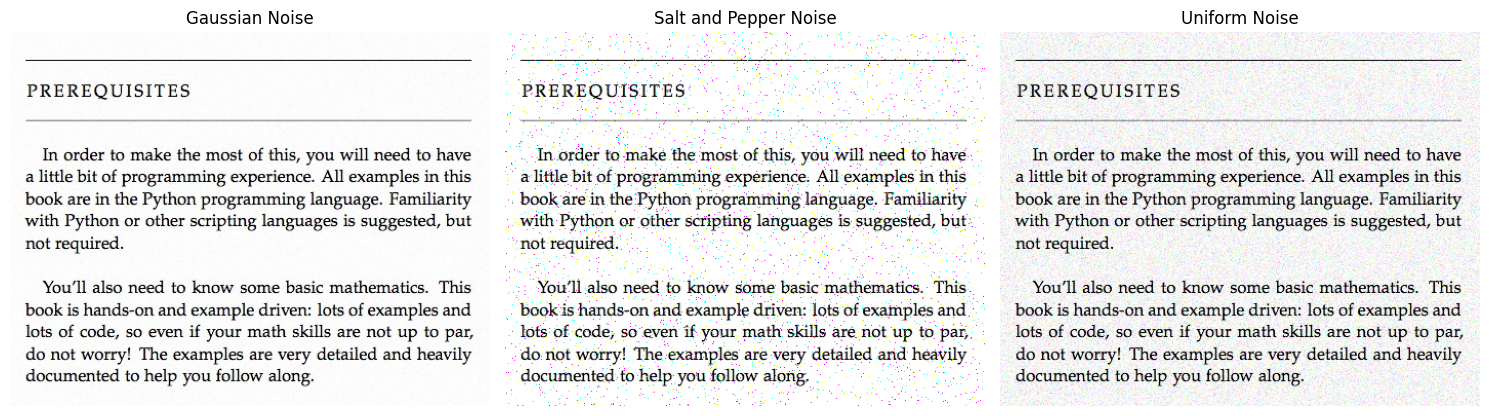

In [4]:
import numpy as np
from PIL import Image
from skimage.util import random_noise
import matplotlib.pyplot as plt

image = Image.open("ocr/example_03.jpg")
image = image.convert("RGB")
np_image = np.array(image)

gaussian_image = random_noise(np_image, mode='gaussian', mean=0, var=25/255**2)
gaussian_image = np.array(255*gaussian_image, dtype=np.uint8)

salt_pepper_image = random_noise(np_image, mode='s&p', amount=0.02)
salt_pepper_image = np.array(255*salt_pepper_image, dtype=np.uint8)

uniform_image = random_noise(np_image, mode='speckle', mean=0, var=0.01)
uniform_image = np.array(255*uniform_image, dtype=np.uint8)

Image.fromarray(gaussian_image).save("noise/image_with_gaussian_noise.jpg")
Image.fromarray(salt_pepper_image).save("noise/image_with_salt_and_pepper_noise.jpg")
Image.fromarray(uniform_image).save("noise/image_with_uniform_noise.jpg")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gaussian_image)
axes[0].axis('off')
axes[0].set_title("Gaussian Noise")

axes[1].imshow(salt_pepper_image)
axes[1].axis('off')
axes[1].set_title("Salt and Pepper Noise")

axes[2].imshow(uniform_image)
axes[2].axis('off')
axes[2].set_title("Uniform Noise")

plt.tight_layout()
plt.show()


3.

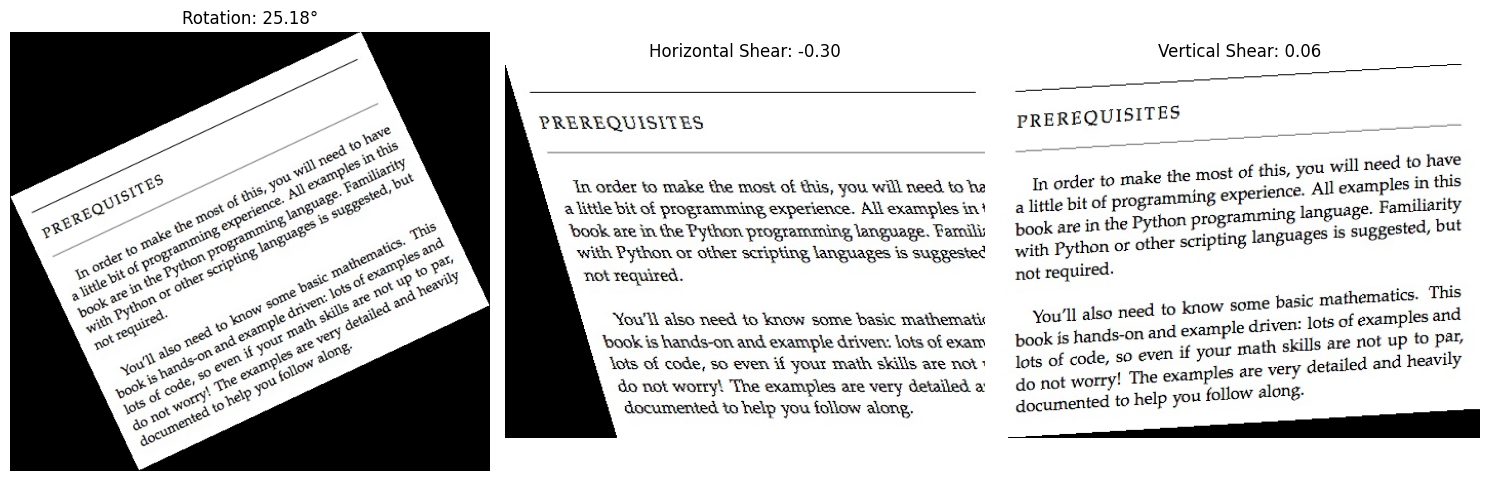

In [5]:
image = Image.open("ocr/example_03.jpg")
image = image.convert("RGB")

def apply_rotation(image, angle):
    return image.rotate(angle, resample=Image.BICUBIC, expand=True)

def apply_horizontal_shear(image, shear_factor):
    width, height = image.size
    shear_matrix = [1, shear_factor, 0, 0, 1, 0]
    return image.transform((width, height), Image.AFFINE, shear_matrix)

def apply_vertical_shear(image, shear_factor):
    width, height = image.size
    shear_matrix = [1, 0, 0, shear_factor, 1, 0]
    return image.transform((width, height), Image.AFFINE, shear_matrix)

angle = random.uniform(-30, 30)
shear_factor_x = random.uniform(-0.5, 0.5)
shear_factor_y = random.uniform(-0.5, 0.5)

rotated_image = apply_rotation(image, angle)
sheared_image_x = apply_horizontal_shear(image, shear_factor_x)
sheared_image_y = apply_vertical_shear(image, shear_factor_y)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(rotated_image)
axes[0].axis('off')
axes[0].set_title(f"Rotation: {angle:.2f}°")

axes[1].imshow(sheared_image_x)
axes[1].axis('off')
axes[1].set_title(f"Horizontal Shear: {shear_factor_x:.2f}")

axes[2].imshow(sheared_image_y)
axes[2].axis('off')
axes[2].set_title(f"Vertical Shear: {shear_factor_y:.2f}")

plt.tight_layout()
plt.show()

4.

In [ ]:
image = Image.open("ocr/example_03.jpg")
image = image.convert("RGB")

def resize_image(image, size):
    return image.resize(size, Image.ANTIALIAS)

shrunk_image = resize_image(image, (int(image.width * 0.5), int(image.height * 0.5)))
enlarged_image = resize_image(image, (int(image.width * 1.5), int(image.height * 1.5)))
altered_aspect_image = resize_image(image, (image.width, int(image.height * 1.5)))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(shrunk_image)
axes[0].axis('off')
axes[0].set_title("Shrunk Image")

axes[1].imshow(enlarged_image)
axes[1].axis('off')
axes[1].set_title("Enlarged Image")

axes[2].imshow(altered_aspect_image)
axes[2].axis('off')
axes[2].set_title("Altered Aspect Ratio")

plt.tight_layout()
plt.show()

5.

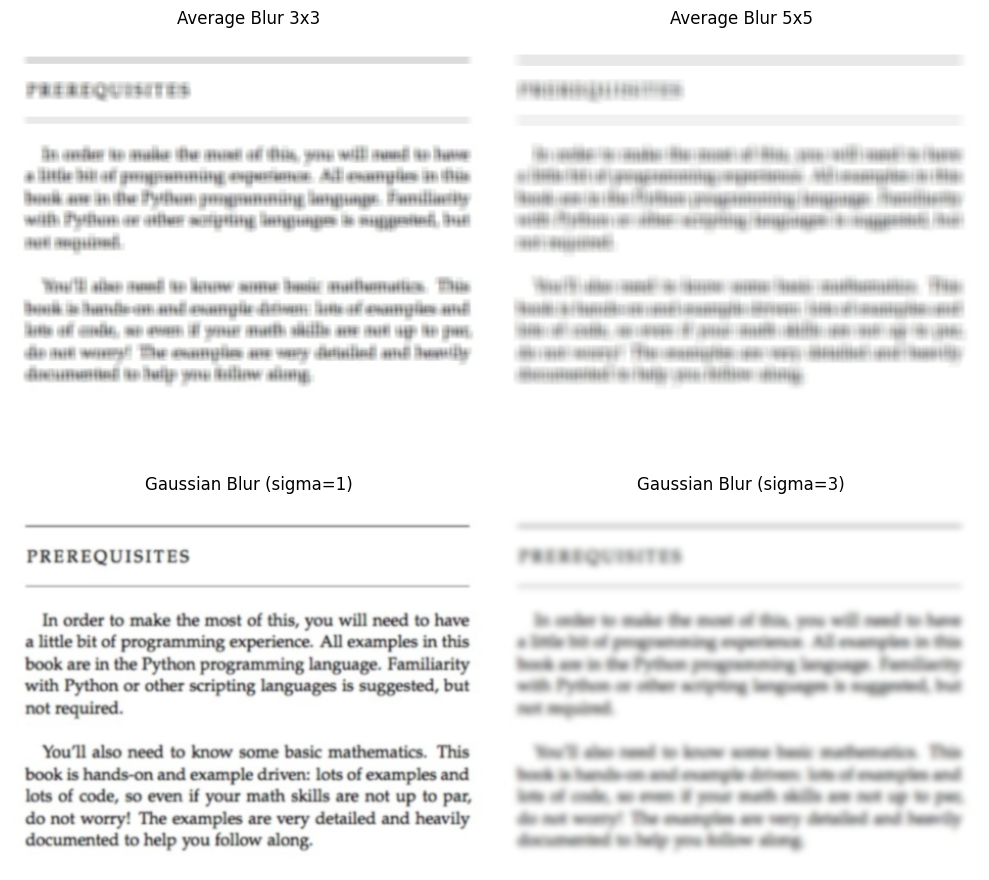

In [7]:
from PIL import Image, ImageFilter

image = Image.open("ocr/example_03.jpg")
image = image.convert("RGB")

def blur_image(image, filter_type, size_or_radius):
    if filter_type == "average":
        return image.filter(ImageFilter.BoxBlur(size_or_radius))
    elif filter_type == "gaussian":
        return image.filter(ImageFilter.GaussianBlur(radius=size_or_radius))

avg_blur_3 = blur_image(image, "average", 3)
avg_blur_5 = blur_image(image, "average", 5)
gaussian_blur_1 = blur_image(image, "gaussian", 1)
gaussian_blur_3 = blur_image(image, "gaussian", 3)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(avg_blur_3)
axes[0, 0].axis('off')
axes[0, 0].set_title("Average Blur 3x3")

axes[0, 1].imshow(avg_blur_5)
axes[0, 1].axis('off')
axes[0, 1].set_title("Average Blur 5x5")

axes[1, 0].imshow(gaussian_blur_1)
axes[1, 0].axis('off')
axes[1, 0].set_title("Gaussian Blur (sigma=1)")

axes[1, 1].imshow(gaussian_blur_3)
axes[1, 1].axis('off')
axes[1, 1].set_title("Gaussian Blur (sigma=3)")

plt.tight_layout()
plt.show()

6.

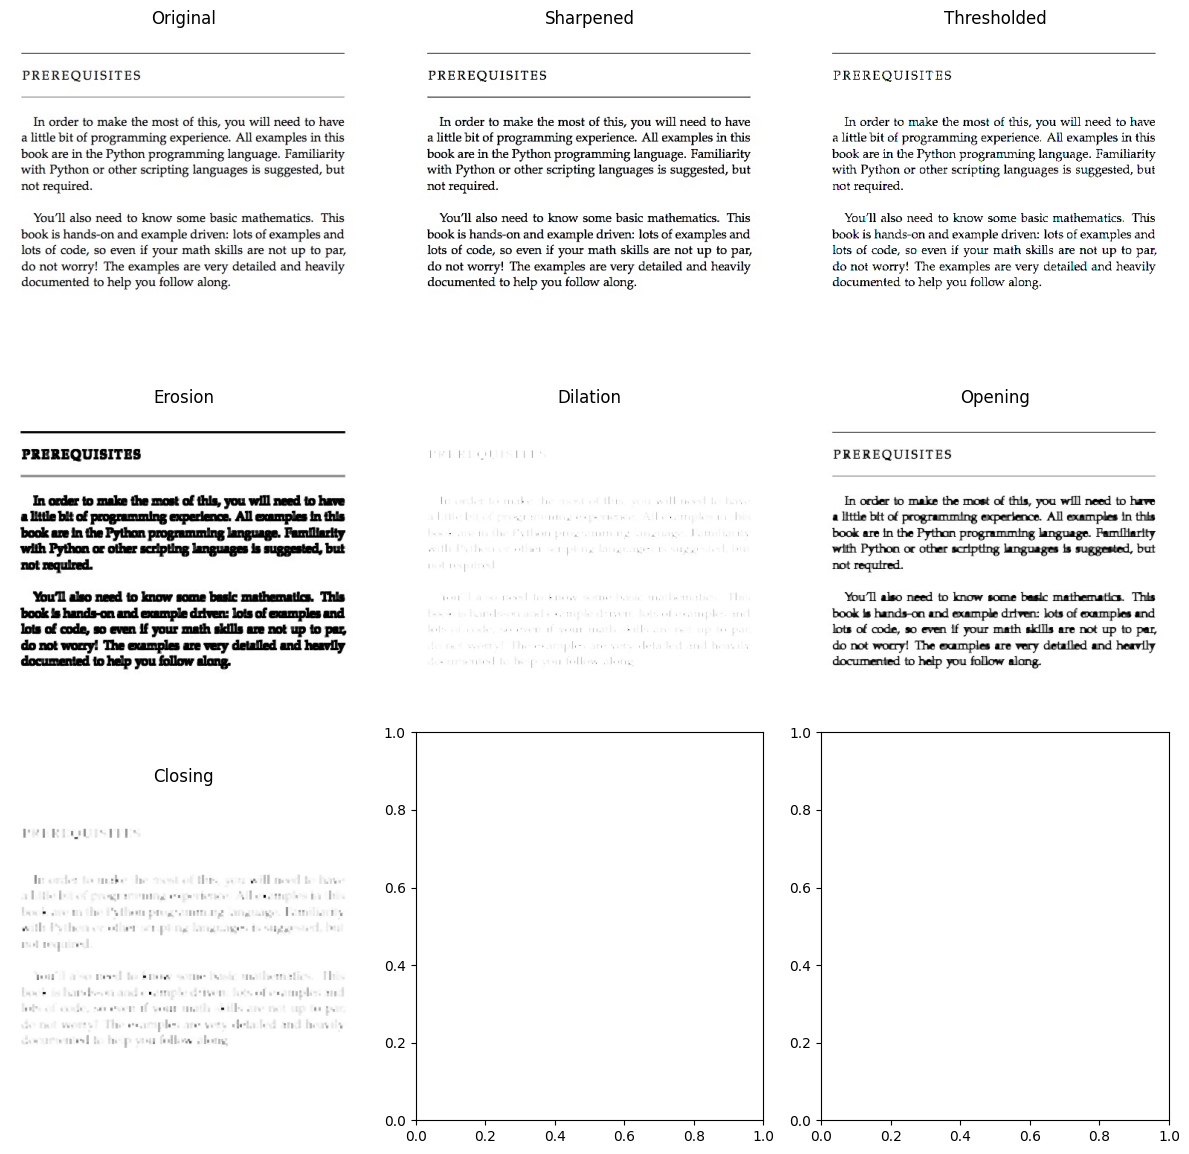

In [ ]:
from skimage import morphology, filters, exposure
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

image = Image.open("ocr/example_03.jpg")
image = image.convert("RGB")
np_image = np.array(image)

def sharpen_image(image):
    return image.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

def threshold_image(image, thresh_value):
    return image.point(lambda p: p > thresh_value and 255)

sharpened_image = sharpen_image(image)

binary_threshold = threshold_image(image, 128)

gray_image = np.dot(np_image[...,:3], [0.2989, 0.5870, 0.1140])

erosion = morphology.erosion(gray_image, morphology.square(3))
dilation = morphology.dilation(gray_image, morphology.square(3))
opening = morphology.opening(gray_image, morphology.square(3))
closing = morphology.closing(gray_image, morphology.square(3))

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes[0, 0].imshow(image)
axes[0, 0].axis('off')
axes[0, 0].set_title("Original")

axes[0, 1].imshow(sharpened_image)
axes[0, 1].axis('off')
axes[0, 1].set_title("Sharpened")

axes[0, 2].imshow(binary_threshold)
axes[0, 2].axis('off')
axes[0, 2].set_title("Thresholded")

axes[1, 0].imshow(erosion, cmap='gray')
axes[1, 0].axis('off')
axes[1, 0].set_title("Erosion")

axes[1, 1].imshow(dilation, cmap='gray')
axes[1, 1].axis('off')
axes[1, 1].set_title("Dilation")

axes[1, 2].imshow(opening, cmap='gray')
axes[1, 2].axis('off')
axes[1, 2].set_title("Opening")

axes[2, 0].imshow(closing, cmap='gray')
axes[2, 0].axis('off')
axes[2, 0].set_title("Closing")

plt.tight_layout()
plt.show()


Evaluate

In [17]:
import numpy as np
from PIL import Image
from skimage.util import random_noise
import pytesseract


def resize_image(image, size):
    return image.resize(size, Image.Resampling.LANCZOS)


def compare_ocr_result(ocr_text, ground_truth):
    ocr_text = ocr_text.strip()
    correct_characters = sum(1 for a, b in zip(ocr_text, ground_truth) if a == b)
    print(f"Ground Truth: {ground_truth}")
    print(f"OCR Output: {ocr_text}")
    print(f"Correct Characters: {correct_characters}/{len(ground_truth)}")
    return correct_characters


def apply_horizontal_shear(image, shear_factor):
    width, height = image.size
    matrix = (1, shear_factor, 0, 0, 1, 0)
    return image.transform((width, height), Image.AFFINE, matrix, resample=Image.BICUBIC)


def apply_vertical_shear(image, shear_factor):
    width, height = image.size
    matrix = (1, 0, 0, shear_factor, 1, 0)
    return image.transform((width, height), Image.AFFINE, matrix, resample=Image.BICUBIC)


def generate_noise_images(image, count):
    noise_images = []
    for _ in range(count):
        noise = np.random.normal(0, 25, (image.height, image.width, 3))
        noisy_array = np.clip(np.array(image) + noise, 0, 255).astype(np.uint8)
        noisy_image = Image.fromarray(noisy_array)
        noise_images.append(noisy_image)
    return noise_images


def apply_transformations(image):
    rotated_image = image.rotate(np.random.uniform(-30, 30), resample=Image.BICUBIC, expand=True)
    shear_factor_x = np.random.uniform(-0.5, 0.5)
    shear_factor_y = np.random.uniform(-0.5, 0.5)
    sheared_image_x = apply_horizontal_shear(image, shear_factor_x)
    sheared_image_y = apply_vertical_shear(image, shear_factor_y)
    shrunk_image = resize_image(image, (int(image.width * 0.5), int(image.height * 0.5)))
    enlarged_image = resize_image(image, (int(image.width * 1.5), int(image.height * 1.5)))

    return [rotated_image, sheared_image_x, sheared_image_y, shrunk_image, enlarged_image]


def display_summary(results):
    print("\n### OCR Summary ###\n")
    for result in results:
        print(f"Image Type: {result['type']} | Index: {result['index']}")
        print(f"Ground Truth: {result['ground_truth']}")
        print(f"OCR Output: {result['ocr_output']}")
        print(f"Correct Characters: {result['correct_chars']}/{result['total_chars']}\n")
    print("### End of Summary ###")


def process_image(image_path):
    image = Image.open(image_path)
    ground_truth = "This is a lot of 12 point text to test the ocr code and see if it works on all types of file format."
    results = []

    noise_images = generate_noise_images(image, 3)
    for i, noise_image in enumerate(noise_images):
        noise_image.save(f"noise_image_{i}.jpg")
        ocr_text = pytesseract.image_to_string(noise_image)
        correct_chars = sum(a == b for a, b in zip(ocr_text, ground_truth))
        results.append({
            "type": "Noise Image",
            "index": i,
            "ground_truth": ground_truth,
            "ocr_output": ocr_text,
            "correct_chars": correct_chars,
            "total_chars": len(ground_truth),
        })

    transformed_images = apply_transformations(image)
    for i, transformed_image in enumerate(transformed_images):
        transformed_image.save(f"transformed_image_{i}.jpg")
        ocr_text = pytesseract.image_to_string(transformed_image)
        correct_chars = sum(a == b for a, b in zip(ocr_text, ground_truth))
        results.append({
            "type": "Transformed Image",
            "index": i,
            "ground_truth": ground_truth,
            "ocr_output": ocr_text,
            "correct_chars": correct_chars,
            "total_chars": len(ground_truth),
        })

    display_summary(results)


if __name__ == "__main__":
    process_image("ocr/example_03.jpg")



### OCR Summary ###

Image Type: Noise Image | Index: 0
Ground Truth: This is a lot of 12 point text to test the ocr code and see if it works on all types of file format.
OCR Output: PREREQUISITES

In order to make the most of this, you will need to have
a little bit of programming experience. All examples in this
book are in the Python programming language. Familiarity
with Python or other scripting languages is suggested, but
not required.

You'll also need to know some basic mathematics. This
book is hands-on and example driven: lots of examples and
lots of code, so even if your math skills are not up to par,
do not worry! The examples are very detailed and heavily
documented to help you follow along.

Correct Characters: 7/100

Image Type: Noise Image | Index: 1
Ground Truth: This is a lot of 12 point text to test the ocr code and see if it works on all types of file format.
OCR Output: PREREQUISITES

In order to make the most of this, you will need to have
a little bit of program